<a href="https://colab.research.google.com/github/rodjoel/correlacion/blob/main/Supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Supermarket 101/supermarket_sales.zip")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
data.corr()

<ipython-input-5-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [6]:
data_test = data.iloc[:,[7,13]]
data_test.head()

,Quantity,cogs
0,7,522.83
1,5,76.40
2,7,324.31
3,8,465.76
4,7,604.17


In [7]:
data = data.loc[:,["Quantity","gross income"]]
data.head()

,Quantity,gross income
0,7,26.1415
1,5,3.8200
2,7,16.2155
3,8,23.2880
4,7,30.2085


<function matplotlib.pyplot.show(close=None, block=None)>

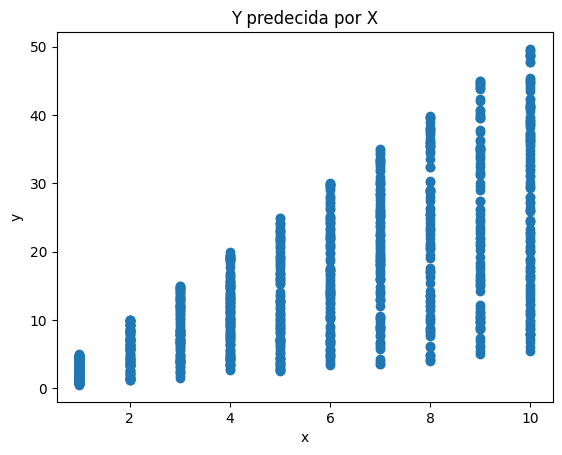

In [8]:
plt.scatter(data["Quantity"],data["gross income"])
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

In [9]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imp.fit(data)
data.iloc[:,:] = imputer.transform(data)
data


<ipython-input-9-07bb2df3c25c>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,:] = imputer.transform(data)


,Quantity,gross income
0,7.0,26.1415
1,5.0,3.8200
2,7.0,16.2155
3,8.0,23.2880
4,7.0,30.2085
...,...,...
995,1.0,2.0175
996,10.0,48.6900
997,1.0,1.5920
998,1.0,3.2910


In [10]:
X = data["gross income"].values.reshape(-1, 1)
y = data["Quantity"]



In [11]:
X_train, X_test, y_train, y_test  = train_test_split(X,y)

In [12]:
print(X_train)

[[ 4.911 ]
 [ 5.984 ]
 [ 9.777 ]
 [26.13  ]
 [12.514 ]
 [35.495 ]
 [11.078 ]
 [ 2.712 ]
 [ 4.669 ]
 [19.255 ]
 [ 8.827 ]
 [10.342 ]
 [12.318 ]
 [ 8.814 ]
 [ 2.568 ]
 [24.332 ]
 [44.6   ]
 [13.038 ]
 [ 4.768 ]
 [23.288 ]
 [20.6185]
 [ 7.888 ]
 [ 1.439 ]
 [ 5.977 ]
 [18.934 ]
 [ 8.0625]
 [33.208 ]
 [34.38  ]
 [21.595 ]
 [ 3.0475]
 [ 0.7715]
 [ 1.3535]
 [ 8.92  ]
 [11.475 ]
 [28.4585]
 [22.413 ]
 [26.558 ]
 [23.094 ]
 [ 1.476 ]
 [ 4.053 ]
 [38.916 ]
 [12.21  ]
 [ 9.711 ]
 [24.186 ]
 [ 9.726 ]
 [ 6.5775]
 [26.388 ]
 [22.491 ]
 [22.353 ]
 [10.3455]
 [39.824 ]
 [ 6.968 ]
 [22.84  ]
 [23.1225]
 [29.008 ]
 [34.392 ]
 [14.79  ]
 [ 4.4425]
 [37.458 ]
 [42.282 ]
 [10.6225]
 [10.3845]
 [17.77  ]
 [10.765 ]
 [43.935 ]
 [ 5.485 ]
 [41.625 ]
 [ 7.038 ]
 [18.945 ]
 [16.743 ]
 [ 8.34  ]
 [ 6.096 ]
 [29.976 ]
 [ 4.9845]
 [ 4.072 ]
 [ 7.43  ]
 [ 6.1155]
 [ 7.204 ]
 [15.106 ]
 [41.29  ]
 [27.935 ]
 [ 3.7485]
 [48.75  ]
 [23.9875]
 [11.9865]
 [ 9.32  ]
 [ 1.7945]
 [17.277 ]
 [11.2005]
 [21.565 ]
 [ 3.3885]

Training Model

In [13]:
reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

coeficientes = reg.coef_
intercepta = reg.intercept_

#coeficientes
print("coeficientes : ",coeficientes[0])

#intercepta:
print("intercepta: ",intercepta)

coeficientes :  0.1780460449198484
intercepta:  2.7601144383332232


In [14]:
print(reg)

LinearRegression()


Prediciendo Valores Del set de datos

In [15]:
predicted_data = reg.predict(X)
predicted_data

array([ 7.41450512,  3.44025033,  5.64722008,  6.90645073,  8.13861839,
        8.08128756,  6.43712136,  9.30864797,  3.4057094 ,  4.2247212 ,
        3.27573578,  3.66850536,  4.84992989,  6.60501878,  9.11457778,
        7.76605704,  7.0555643 ,  6.63849143,  4.22018103,  3.47764   ,
        6.58988486,  5.10978809,  3.35122731,  4.29843227,  5.12714758,
        6.50549104,  3.05851961,  4.32104411,  6.69315157,  4.75431916,
        6.94998299,  9.01513907,  8.7267935 ,  4.47968314,  6.300382  ,
        3.36653927,  5.54742527,  7.63786388,  6.67142995,  4.90521319,
        3.53212209,  3.7591308 ,  6.45207723,  9.78937229,  3.03377121,
        6.10595571,  7.30215807,  4.36333005,  3.77123793, 10.11608678,
        8.45580742,  4.74488272,  3.396451  ,  2.89747696,  3.04783685,
        8.88347402,  3.5495706 ,  9.14128469,  9.20093011,  4.39511127,
        3.42084331,  5.73686626,  7.1723625 ,  4.16756842,  5.45715593,
        4.1729098 ,  3.35603455,  7.97383677,  9.77245792,  2.92

In [16]:
predicted_train = reg.predict(X_train)

In [17]:
predicted_test = reg.predict(X_test)

Ploting Regression

<function matplotlib.pyplot.show(close=None, block=None)>

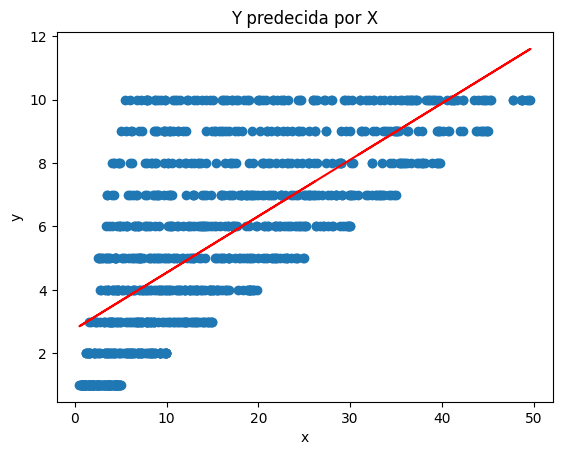

In [18]:
plt.scatter(X,y)
plt.plot(X,predicted_data,color="red")
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

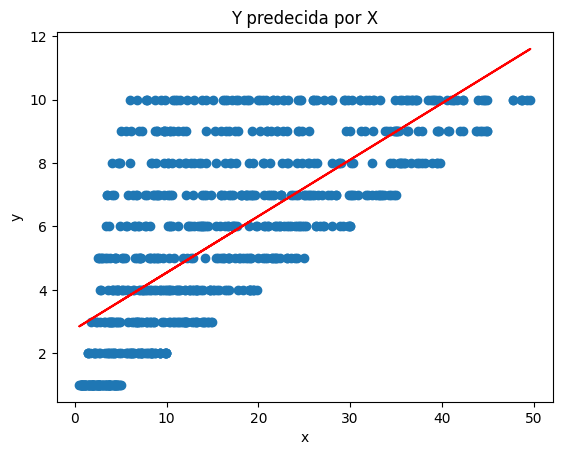

In [19]:
plt.scatter(X_train,y_train)
plt.plot(X_train,predicted_train,color="red")
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

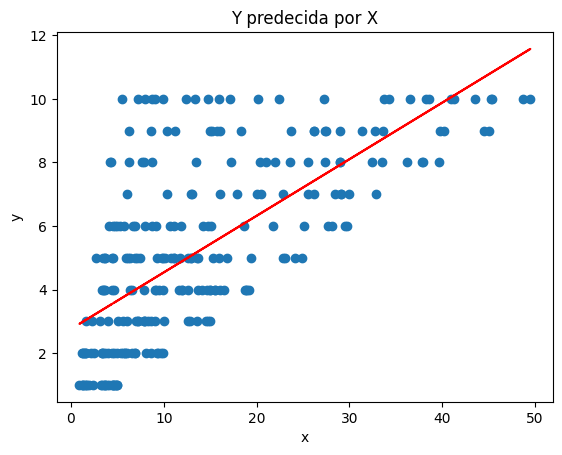

In [20]:
plt.scatter(X_test,y_test)
plt.plot(X_test,predicted_test,color="red")
plt.title('Y predecida por X')
plt.xlabel('x')
plt.ylabel('y')
plt.show

Dataframe de actual y predecido

In [21]:
A_P_data = pd.DataFrame({"actual":y,"predicted":predicted_data})

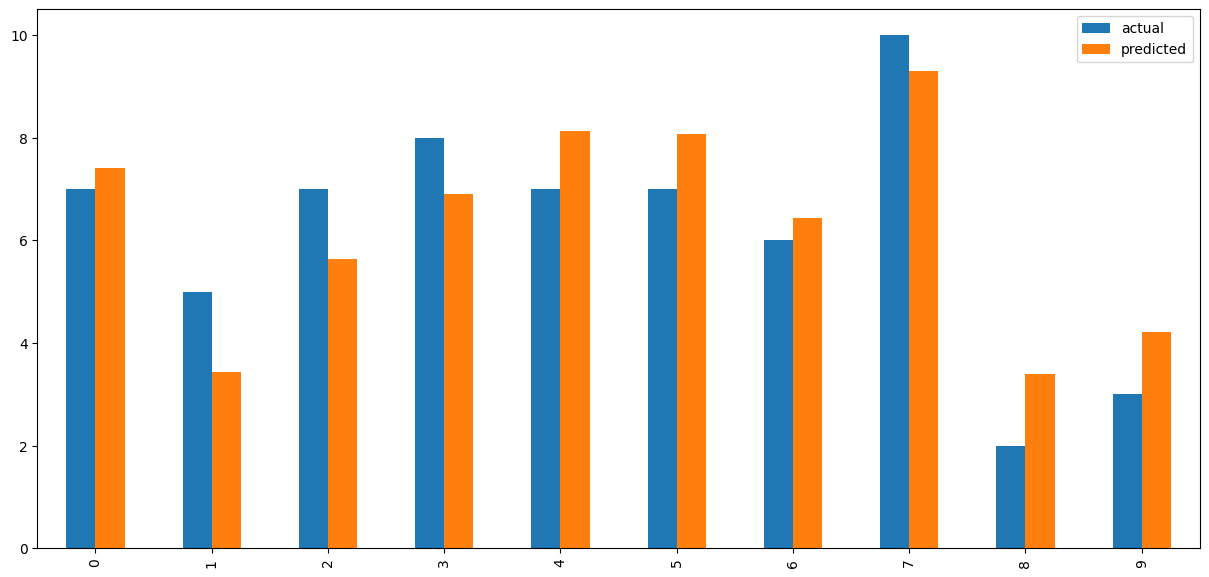

In [22]:
A_P_data.head(10).plot(kind='bar',figsize=(15,7))
plt.show()

In [23]:
y_predict = reg.predict(X_test)

res = (y_predict - y_test)
RSS = (res*res).sum()

print("residual de suma de cuadrados: ",RSS)

residual de suma de cuadrados:  1104.2640748802417
